In [200]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [201]:
data = pd.read_csv("C:\\Desktop\\winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [202]:
data["good_quality"] = [1 if x >= 7 else 0 for x in data["quality"]]
data.drop(["quality"], axis=1, inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [203]:
class_count_0, class_count_1 = data['good_quality'].value_counts()
class_0 = data[data['good_quality'] == 0]
class_1 = data[data['good_quality'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1382, 12)
class 1: (217, 12)


In [204]:
x = data.drop(columns=['good_quality'])
y = data['good_quality']
x.head(),y.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  
 0      9.4  
 1      9.8  
 2      9.8  
 3      9.8  
 4

Here we have 1382 data for class 0 and only 217 data for class 1. When I tried to fit it for losistic regression, I got a very good accccuracy but got a very bad f1 score(around 0.3) and for class 0, accuracy is good but for class 1 accuracy is not good. This can be happened by unbalanced data set.
So I am using over sampling from imblearn library. 

In [205]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))
x_ros

Original dataset shape Counter({0: 1382, 1: 217})
Resample dataset shape Counter({0: 1382, 1: 1382})


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
2759,10.1,0.380,0.50,2.4,0.104,6.0,13.0,0.99643,3.22,0.65,11.6
2760,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0
2761,8.3,0.310,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.5
2762,7.7,0.915,0.12,2.2,0.143,7.0,23.0,0.99640,3.35,0.65,10.2


In [206]:
x_ros_new = np.hstack((x_ros, y_ros.values.reshape(-1, 1)))
pd.DataFrame(x_ros_new)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2759,10.1,0.380,0.50,2.4,0.104,6.0,13.0,0.99643,3.22,0.65,11.6,1.0
2760,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0,1.0
2761,8.3,0.310,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.5,1.0
2762,7.7,0.915,0.12,2.2,0.143,7.0,23.0,0.99640,3.35,0.65,10.2,1.0


Losistic Regression from scratch

In [207]:
def min_max(dataset):
    minmax = []
    for i in range(len(dataset[0])):
        column_val = [j[i] for j in dataset]
        min_val = min(column_val)
        max_val = max(column_val)
        minmax.append([min_val,max_val])
    return minmax

minmax = min_max(x_ros_new)
minmax

[[4.6, 15.9],
 [0.12, 1.58],
 [0.0, 1.0],
 [0.9, 15.5],
 [0.012, 0.611],
 [1.0, 72.0],
 [6.0, 289.0],
 [0.99007, 1.00369],
 [2.74, 4.01],
 [0.33, 2.0],
 [8.4, 14.9],
 [0.0, 1.0]]

In [208]:
def normalization(dataset,minmax):
    for i in range(len(dataset)):
        for j in range(len(dataset[0])):
            n = dataset[i][j] - minmax[j][0]
            d = minmax[j][1] - minmax[j][0]
            dataset[i][j] = n/d
    return dataset

x_ros_new = normalization(x_ros_new,minmax)
pd.DataFrame(x_ros_new)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2759,0.486726,0.178082,0.50,0.102740,0.153589,0.070423,0.024735,0.466960,0.377953,0.191617,0.492308,1.0
2760,0.380531,0.157534,0.40,0.184932,0.163606,0.154930,0.063604,0.397944,0.385827,0.221557,0.553846,1.0
2761,0.327434,0.130137,0.39,0.102740,0.110184,0.225352,0.130742,0.320852,0.448819,0.263473,0.630769,1.0
2762,0.274336,0.544521,0.12,0.089041,0.218698,0.084507,0.060071,0.464758,0.480315,0.191617,0.276923,1.0


In [209]:
from random import shuffle
def train_test_split(dataset):
    shuffle(dataset)
    m= int(0.8*len(dataset))
    
    train_data = dataset[:m]
    test_data =  dataset[m:]
    
    return train_data,test_data

train_data,test_data = train_test_split(x_ros_new)
len(train_data),len(test_data)

(2211, 553)

In [210]:
def accuracy_check(pred,actual):
    count = 0
    for i in range(len(actual)):
        if(pred[i]==actual[i]):
            count+=1
    acc = (count/len(actual))*100
    return acc

In [211]:

import math 

def prediction(row,parameters):
    hypothesis = parameters[0]
    for i in range(len(row)-1):
        hypothesis+=row[i]*parameters[i+1]
    return 1 / (1 + math.exp(-hypothesis))

In [212]:
def cost_function(x,parameters):
    cost = 0
    for row in x:
        pred = prediction(row,parameters)
        actual = row[-1]
        cost+= -(actual*np.log(pred))+(-(1-actual)*np.log(1-pred))
    avg_cost = cost/len(x)
    return avg_cost

In [213]:
def gradient_descent(x,epochs,alpha):
    
    parameters = [0]*len(x[0])
    cost_history = []
    n = len(x)
    
    for i in range(epochs):
        for row in x:
            pred = prediction(row,parameters)
            #for theta 0 partial derivative is different
            parameters[0] = parameters[0]-alpha*(pred-row[-1])
            for j in range(len(row)-1):
                parameters[j+1] = parameters[j+1]-alpha*(pred-row[-1])*row[j]
        cost_history.append(cost_function(x,parameters))
    return cost_history,parameters

In [214]:
import matplotlib.pyplot as plt

def algorithm(train_data,test_data):
    
    epochs = 1000
    alpha = 0.03
    cost_history,parameters = gradient_descent(train_data,epochs,alpha)
    predictions = []
    
    for i in test_data:
        pred = prediction(i,parameters)
        predictions.append(round(pred))
    y_actual = [i[-1] for i in test_data]    
    accuracy = accuracy_check(predictions,y_actual)
    
    iterations = [i for i in range(1,epochs+1)]
    plt.plot(iterations,cost_history)
    plt.show()
    return accuracy,predictions

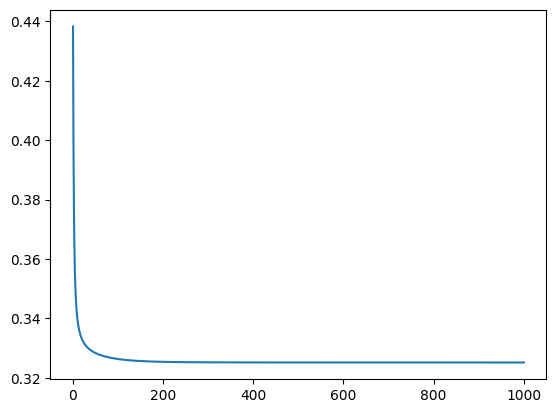

78.84267631103074
f1_score: {0.7405764966740577}


array([[269,  86],
       [ 31, 167]], dtype=int64)

In [215]:
accuracy,predictions=algorithm(train_data,test_data)
true_value=test_data[:,11]
print(accuracy)
from sklearn.metrics import confusion_matrix,f1_score
f1_score_scratch=f1_score(predictions,true_value)
print("f1_score:",{f1_score_scratch})
confusion_matrix(predictions,true_value)

In [216]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(x_ros)
x_ros=min_max_scaler.transform(x_ros)
x_ros

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.32743363, 0.13013699, 0.39      , ..., 0.4488189 , 0.26347305,
        0.63076923],
       [0.27433628, 0.54452055, 0.12      , ..., 0.48031496, 0.19161677,
        0.27692308],
       [0.34513274, 0.10958904, 0.56      , ..., 0.44094488, 0.25149701,
        0.32307692]])

Logistic regression 

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
features_train,features_test,target_train,target_test=train_test_split(x_ros,y_ros,test_size=0.2,random_state=0)
from sklearn.linear_model import LogisticRegression
dataset=load_wine()
regressor=LogisticRegression()
regressor.fit(features_train,target_train)
target_pred=regressor.predict(features_test)
f1_score_skl=f1_score(target_pred,target_test)
accu_sklearn=accuracy_score(target_pred,target_test)
print("Accuracy: ",{accu_sklearn*100},"%")
print("f1_score:",{f1_score_skl})
confusion_matrix(target_pred,target_test)

Accuracy:  {78.30018083182641} %
f1_score: {0.7818181818181819}


array([[218,  51],
       [ 69, 215]], dtype=int64)

Losistic Regression using Knn methode

In [218]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
knn.fit(features_train,target_train)
target_pred_knn=knn.predict(features_test)
f1_score_knn=f1_score(target_pred_knn,target_test)
accu_knn=accuracy_score(target_pred_knn,target_test)
print("Accuracy: ",{accu_knn*100},"%")
print("f1_score:",{f1_score_knn})
confusion_matrix(target_pred_knn,target_test)

Accuracy:  {91.500904159132} %
f1_score: {0.9171075837742504}


array([[246,   6],
       [ 41, 260]], dtype=int64)

Losistic Regression using decision Tree

In [219]:
from sklearn import tree

classification = tree.DecisionTreeClassifier()
classification.fit(features_train, target_train)
pred_tree = classification.predict(features_test)
accu_tree=accuracy_score(pred_tree,target_test)
print("Accuracy:",{accu_tree*100},"%")
f1_score_tree=f1_score(pred_tree,target_test)
print("f1_score:",{f1_score_tree})
confusion_matrix(pred_tree,target_test)

Accuracy: {95.84086799276673} %
f1_score: {0.9585585585585586}


array([[264,   0],
       [ 23, 266]], dtype=int64)

Losistic Regression using random forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier()
rnd.fit(features_train,target_train)
pred_random_forest=rnd.predict(features_test)
accu_random_forest=accuracy_score(pred_random_forest,target_test)
print("accuracy:",{accu_random_forest*100},"%")
f1_score_random=f1_score(pred_random_forest,target_test)
print("f1_score:",{f1_score_random})
confusion_matrix(pred_random_forest,target_test)

accuracy: {96.56419529837251} %
f1_score: {0.9655172413793104}


array([[268,   0],
       [ 19, 266]], dtype=int64)